In [43]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [44]:
plt.rcParams['figure.figsize'] = [16, 8]

In [45]:
plt.rcParams.update({'font.size': 18})

In [82]:
theta = np.array([np.pi/15, -np.pi/9, np.pi/20])

In [83]:
Sigma = np.diag([2, 1, 0.5])

In [85]:
# Rotation about x asis
Rx = np.array([[1, 0, 0],
                 [0, np.cos(theta[0]), -np.sin(theta[0])],
                 [0, np.sin(theta[0]), np.cos(theta[0])]])

In [86]:
# Rotation about y asis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

In [87]:
# Rotation about z asis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

In [88]:
# rotate and scale
X = Rz @ Ry @ Rx @ Sigma
# U, S, VT = np.linalg.svd(X, full_matrix=False)
# X = U @ np.diag(S)

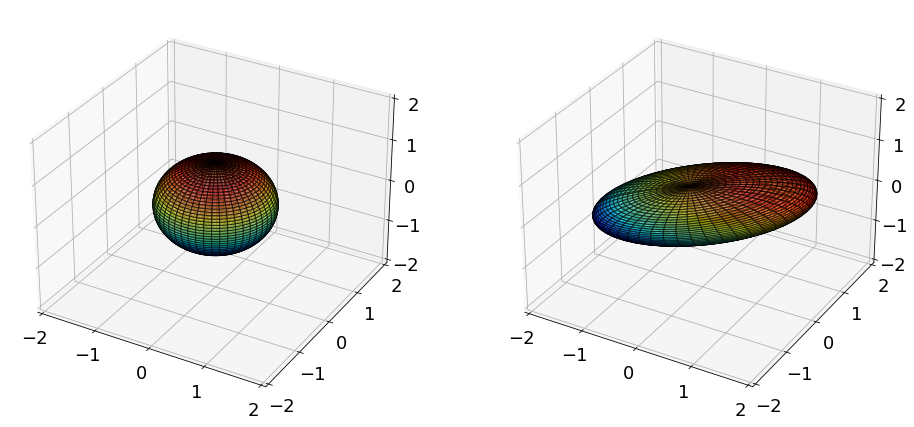

In [102]:
# plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection = '3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet', alpha=0.6)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i, j], y[i, j], z[i, j]]
        vecR = X @ vec 
        xR[i, j] = vecR[0]
        yR[i, j] = vecR[1]
        zR[i, j] = vecR[2]

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.6)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()
